In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import cv2
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Activation, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.layers import Convolution2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import metrics
from keras.preprocessing import image
from keras.applications.mobilenet import preprocess_input
import os

In [2]:
train_loc = 'C:/Users/Hesham/Desktop/data divided/train'
test_loc = 'C:/Users/Hesham/Desktop/data divided/test'
val_loc = 'C:/Users/Hesham/Desktop/data divided/val'

In [3]:
#traindata#trdata = train_data
#tsdata = test_data
#batch_size = 32 .. take 32 img from train data Then go back and forth , and each of epoch take iteration (to update width, loss fun, acc)
#trdataGen = object of datagenerator
trdataGen = ImageDataGenerator(
                            rescale = 1./255, #To rescaling the image in range of [0,1]
                            shear_range = 0.2, # To randomly shear the images
                            zoom_range = 0.2,  #To randomly zoom the images
                            rotation_range=30, #Rotate images by 30 degrees
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip = True #for randomly flipping half of the images horizontally 
                                                   )

traindata = trdataGen.flow_from_directory(directory = train_loc, target_size = (224,224), batch_size=32)

valdatadGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
testdataGen = tf.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)

test_batches = valdatadGen.flow_from_directory(test_loc, target_size=(224, 224), batch_size=32)

val_batches = testdataGen.flow_from_directory(val_loc, target_size=(224, 224), batch_size=32)

Found 10874 images belonging to 6 classes.
Found 1369 images belonging to 6 classes.
Found 1356 images belonging to 6 classes.


In [4]:
traindata.class_indices

{'freshapples': 0,
 'freshbanana': 1,
 'freshoranges': 2,
 'rottenapples': 3,
 'rottenbanana': 4,
 'rottenoranges': 5}

In [5]:
X_train, y_train = next(traindata)
X_test, y_test = next(test_batches)
X_val, y_val = next(val_batches)

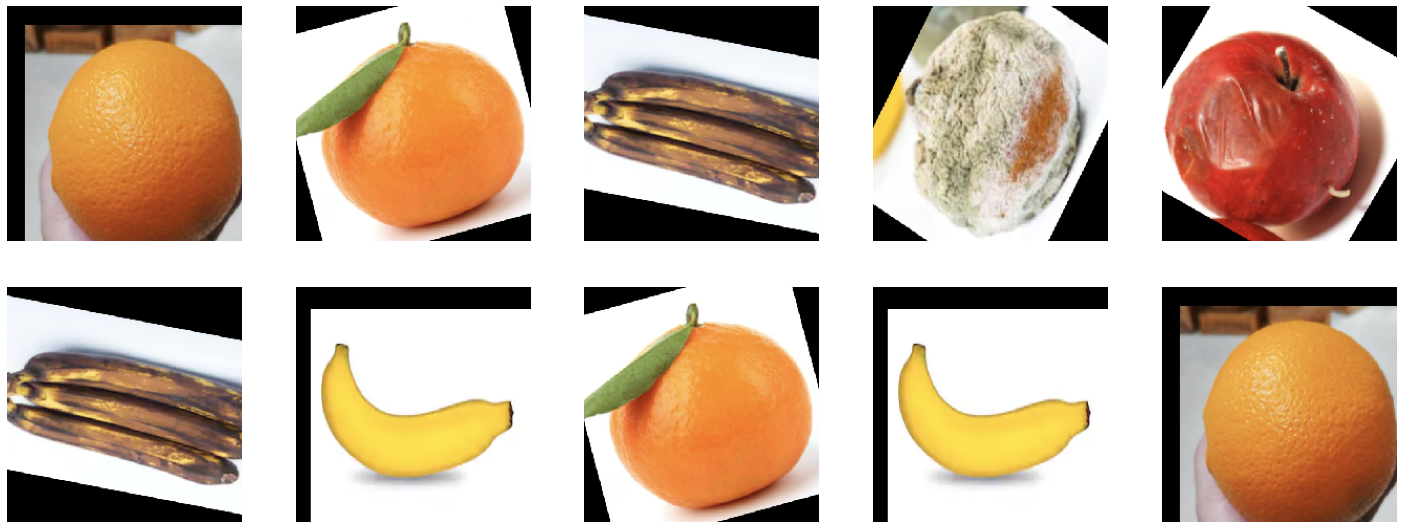

In [6]:
plt.figure(figsize=(25, 25))
for n, i in enumerate(np.random.randint(0, len(X_test), 10)):
    plt.subplot(5, 5, n+1)
    plt.imshow((X_test[i]))
    plt.xlabel(traindata[np.argmax(y_test[i])])
    plt.axis('off')

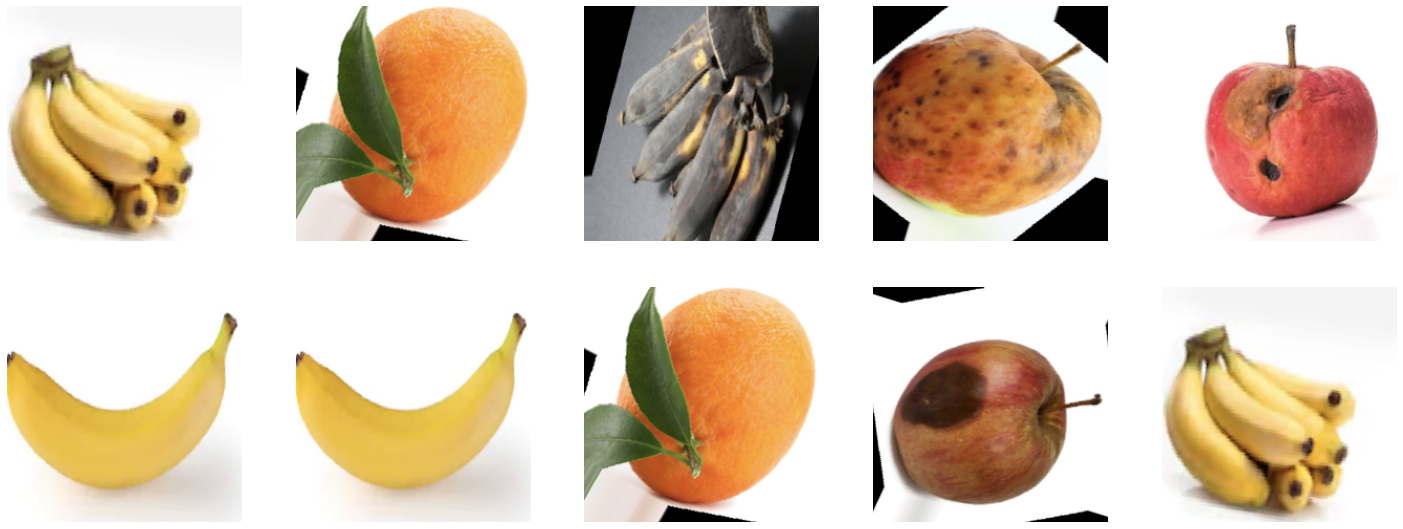

In [7]:
plt.figure(figsize=(25, 25))
for n, i in enumerate(np.random.randint(0, len(X_train), 10)):
    plt.subplot(5, 5, n+1)
    plt.imshow((X_train[i]))
    plt.xlabel(traindata[np.argmax(y_train[i])])
    plt.axis('off')

In [8]:
#Initializing CNN
classifier = Sequential()

#adding 1st Convolution layer and Pooling layer
classifier.add(Convolution2D(32, kernel_size =(3,3),  input_shape = (224,224,3),activation = 'relu', name = 'Layer_0'))
classifier.add(MaxPooling2D(pool_size = (2, 2), name = 'layer_1'))

#adding 2nd convolution layer and polling layer
classifier.add(Convolution2D(32, (3,3), padding = 'same' ,activation = 'relu', name = 'layer_2'))
classifier.add(MaxPooling2D(pool_size = (2, 2), name = 'layer_3'))

#Flattening the layers
classifier.add(Flatten()) # from 2D to 1D

#Full_Connection
classifier.add(Dense(units = 32,  activation = 'relu', name = 'layer_4'))
classifier.add(Dense(units = 64,  activation = 'relu', name = 'layer_5'))
classifier.add(Dense(units = 128, activation = 'relu', name = 'layer_6'))
classifier.add(Dense(units = 256, activation = 'relu', name = 'layer_7'))
classifier.add(Dense(units = 256, activation = 'relu', name = 'layer_8'))

classifier.add(Dense(units=6,activation = 'softmax', name ='predictions'))

In [9]:
# CNN Structure
model = classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Layer_0 (Conv2D)            (None, 222, 222, 32)      896       
                                                                 
 layer_1 (MaxPooling2D)      (None, 111, 111, 32)      0         
                                                                 
 layer_2 (Conv2D)            (None, 111, 111, 32)      9248      
                                                                 
 layer_3 (MaxPooling2D)      (None, 55, 55, 32)        0         
                                                                 
 flatten (Flatten)           (None, 96800)             0         
                                                                 
 layer_4 (Dense)             (None, 32)                3097632   
                                                                 
 layer_5 (Dense)             (None, 64)                2

In [10]:
classifier.compile(
                optimizer = 'adam',
                loss = 'categorical_crossentropy',
                metrics=['accuracy']
)

In [11]:
batch_size = 32 # take 32 img from train data Then go back and forth , and each of epoch take iteration (to update width, loss fun, acc)
hist = classifier.fit(traindata, steps_per_epoch = traindata.samples//batch_size,
                 validation_data = test_batches,
                 validation_steps = test_batches.samples//batch_size,
                 epochs = 15
                 )

Epoch 1/15
339/339 [==============================] - 1047s 3s/step - loss: 0.9668 - accuracy: 0.6063 - val_loss: 0.5573 - val_accuracy: 0.7932
Epoch 2/15
339/339 [==============================] - 736s 2s/step - loss: 0.5546 - accuracy: 0.8020 - val_loss: 0.4703 - val_accuracy: 0.8229
Epoch 3/15
339/339 [==============================] - 481s 1s/step - loss: 0.4230 - accuracy: 0.8554 - val_loss: 0.2965 - val_accuracy: 0.8906
Epoch 4/15
339/339 [==============================] - 408s 1s/step - loss: 0.3660 - accuracy: 0.8705 - val_loss: 0.2567 - val_accuracy: 0.9092
Epoch 5/15
339/339 [==============================] - 430s 1s/step - loss: 0.3168 - accuracy: 0.8854 - val_loss: 0.2358 - val_accuracy: 0.9100
Epoch 6/15
339/339 [==============================] - 494s 1s/step - loss: 0.2903 - accuracy: 0.8955 - val_loss: 0.1911 - val_accuracy: 0.9271
Epoch 7/15
339/339 [==============================] - 408s 1s/step - loss: 0.2762 - accuracy: 0.9024 - val_loss: 0.2456 - val_accuracy: 0.907

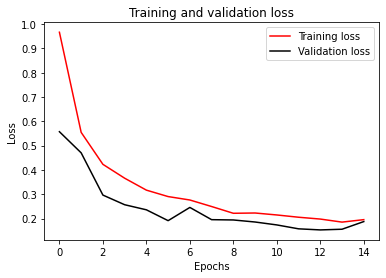

In [12]:
plt.plot(hist.history['loss'], color = 'r',label = 'Training loss')
plt.plot(hist.history['val_loss'], color = 'k',label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.legend()
plt.show()

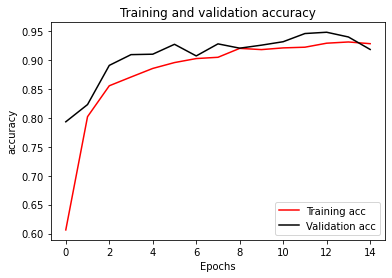

In [13]:
plt.plot(hist.history['accuracy'], color = 'r', label = 'Training acc')
plt.plot(hist.history['val_accuracy'], color = 'k',label = 'Validation acc')
plt.title('Training and validation accuracy', color='k')
plt.xlabel('Epochs')
plt.ylabel("accuracy")
plt.legend()
plt.show()

C:\Users\Hesham\AppData\Local\Temp/ipykernel_23772/597767248.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = classifier.predict_generator(test_batches)


Confusion Matrix
[[33 15 31 58 48 25]
 [38 30 30 47 32 21]
 [28 17 27 45 55 16]
 [45 44 34 68 58 47]
 [46 53 35 67 46 29]
 [37 36 23 52 39 14]]
classification_Report
              precision    recall  f1-score   support

       f_app       0.15      0.16      0.15       210
       f_ban       0.15      0.15      0.15       198
       f_ora       0.15      0.14      0.15       188
       r_app       0.20      0.23      0.21       296
       r_ban       0.17      0.17      0.17       276
       r_ora       0.09      0.07      0.08       201

    accuracy                           0.16      1369
   macro avg       0.15      0.15      0.15      1369
weighted avg       0.16      0.16      0.16      1369



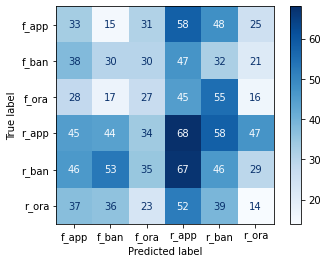

In [14]:
target_names = ['f_app', 'f_ban', 'f_ora', 'r_app', 'r_ban', 'r_ora']
#target_names = ['freshapples', 'freshbanana', 'freshoranges', 'rottenapples', 'rottenbanana', 'rottenoranges']
labels_name = [0, 1, 2, 3, 4, 5]

y_pred = classifier.predict_generator(test_batches)
x_pred = np.argmax(y_pred, axis = 1)

cm = confusion_matrix(test_batches.classes, x_pred, labels = labels_name)
print('Confusion Matrix')
print(confusion_matrix(test_batches.classes, x_pred))

print('classification_Report')
print(classification_report(test_batches.classes, x_pred, target_names=target_names))

disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=target_names)
disp = disp.plot(cmap=plt.cm.Blues, values_format = 'g')


plt.show()



In [15]:
test_ph = 'C:\\Users\\Hesham\\Desktop\\data divided\\train\\freshapples\\rotated_by_15_Screen Shot 2018-06-08 at 5.33.05 PM.png'

In [16]:
type_of_fruits= ['fresh apples', 'fresh banana', 'fresh oranges', 'rotten apples', 'rotten banana', 'rotten oranges']

In [17]:
img=cv2.imread(test_ph)

In [18]:
img_arr = plt.imread(test_ph)
img = cv2.resize(img_arr, (224, 224))
img = np.expand_dims(img, axis=0)
img = img/255

rotten apples


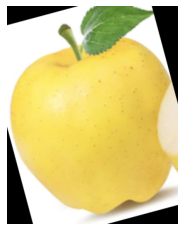

In [19]:
pred = classifier.predict(img)
plt.imshow(img_arr)
plt.axis('off')
print(type_of_fruits[np.argmax(pred)])

In [ ]:
path = 'C:\\Users\Hesham\\Desktop\\data divided\\test\\freshbanana'

In [ ]:
paths = [os.path.join(path,s) for s in os.listdir(path)]

In [ ]:
print(len(paths))